### What this does

This is a prototype meant to generate a noisy test signal which is written into a `.txt` file and will be read from verilog in order to test the operation of the design


Designs written in python and design in verilog will read the same `.txt` file for consistancy

In [10]:
# Importing numpy and 

import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import random

In [11]:
# Generating time signals

# freq = base frequency of signal
# noiseFreq = high frequency noisy addition
# noiseAmplitude = strength of random white noise that's added to signal (0 to 1)
# amplitude = magnitude of sin waves. Keep at a high value to reduce rounding errors

freq = 500 # kHz
numPeriods = 6

noiseFreq1 = 10000 # kHz
noiseFreq2 = 4000 # kHz
amplitude = 1000

noiseAmplitude = 1
whiteNoiseAmplitude = 0.0

period = 1/freq
endTime = period * numPeriods

Fs = 15000 # sampling rate
num = int(endTime * Fs)

time = np.linspace (0, endTime, num) # Due to the way digital filters work, the time interval between points is 1/Fs

createPlot = False
writeFile = False


# Generating base sin wave signal
base_signal = np.sin(2*np.pi*freq * time) * amplitude

noisy_high_freq_signal1 = np.sin (2 * np.pi * noiseFreq1 * time) * amplitude * noiseAmplitude
noisy_high_freq_signal2 = np.sin (2 * np.pi * noiseFreq2 * time) * amplitude * noiseAmplitude

white_noise_signal = []

for i in range (0, np.size(time)) :
    n = random.randint(-60, 60) / 10 * whiteNoiseAmplitude * amplitude
    white_noise_signal.append(n)

test_signal = base_signal + noisy_high_freq_signal1 + noisy_high_freq_signal2 + white_noise_signal


# Creating plot
if (createPlot == True):
    plt.plot(time, test_signal, label = 'test signal')
    plt.plot(time, base_signal, label = 'base signal')
    plt.legend()
    plt.ylabel('Amplitude')
    plt.xlabel('Time (s)')
    plt.show()


if (writeFile == True): 
    test_signal_rounded = np.round(test_signal, 0)

    # Writing into file
    np.savetxt('test_signal.txt', test_signal_rounded, fmt='%d')
    np.savetxt('test_signal.csv', test_signal_rounded, delimiter=',', fmt='%d')

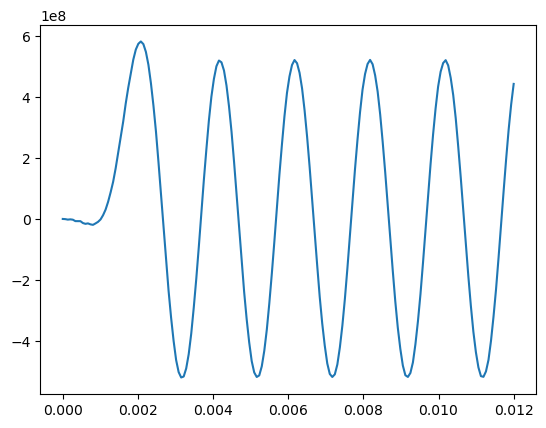

53

In [12]:
signal_data = genfromtxt('test_signal.csv', delimiter=',')

h = [
    -0.000728717810695982,
    -0.000920207838011182,
    -0.001179116394195415,
    -0.001514341993344433,
    -0.001911612652238840,
    -0.002329880401781458,
    -0.002700396794045534,
    -0.002928799824347005,
    -0.002900261718868476,
    -0.002487448064227224,
    -0.001560749932598318,
    0.000000000000000001,
    0.002293303650663482,
    0.005384346428573937,
    0.009295007514838725,
    0.013996528820491372,
    0.019405654199581387,
    0.025384784676784528,
    0.031746371518973700,
    0.038261414752271364,
    0.044671581354925827,
    0.050704136499440298,
    0.056088622115285015,
    0.060574043792493579,
    0.063945256322699207,
    0.066037277627684590,
    0.066746408299293833,
    0.066037277627684590,
    0.063945256322699207,
    0.060574043792493579,
    0.056088622115285029,
    0.050704136499440312,
    0.044671581354925827,
    0.038261414752271371,
    0.031746371518973700,
    0.025384784676784535,
    0.019405654199581394,
    0.013996528820491374,
    0.009295007514838730,
    0.005384346428573937,
    0.002293303650663481,
    0.000000000000000001,
    -0.001560749932598318,
    -0.002487448064227226,
    -0.002900261718868481,
    -0.002928799824347006,
    -0.002700396794045536,
    -0.002329880401781458,
    -0.001911612652238840,
    -0.001514341993344433,
    -0.001179116394195415,
    -0.000920207838011182,
    -0.000728717810695982,
]

unroundedFilterCoeffs = np.array(h)

b = np.round(unroundedFilterCoeffs * ( 2 ** 20), 0)
# b = unroundedFilterCoeffs
order = np.size (b)

# print(b.astype(int))
# np.set_printoptions(suppress=True)

# print(b)

y = []
numDataPoints = np.size(signal_data)


# implementing a delay line
delayLine = np.zeros(order)

for i in range (np.size(signal_data)) :
    delayLine[0] = signal_data[i]

    # Fill delay line
    for j in reversed(range (1, order)) :
        delayLine[j] = delayLine[j-1]

    # multiply and accumulate
    multResult = np.multiply(b, delayLine)
    y.append(sum(multResult))
    

plt.plot(time, y)
plt.show()

# for val in b:
#     print(int(val),",")

np.size(b)


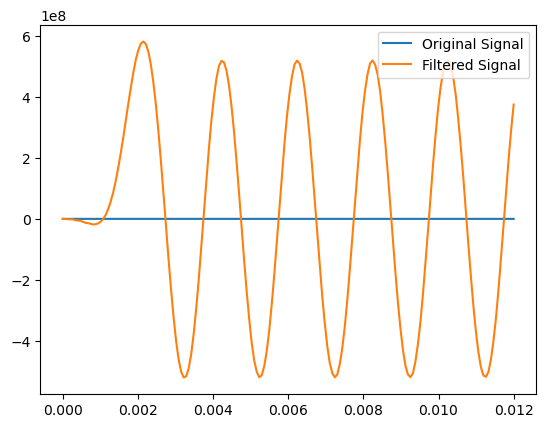

In [13]:
from scipy.signal import firwin, lfilter

filtered_signal = lfilter(b, 1.0, signal_data)
plt.plot(time, signal_data, label='Original Signal')
plt.plot(time, filtered_signal, label='Filtered Signal')
plt.legend()
plt.show()


### sin waves must be generated with the same Fs that FIR coefficients are generated at

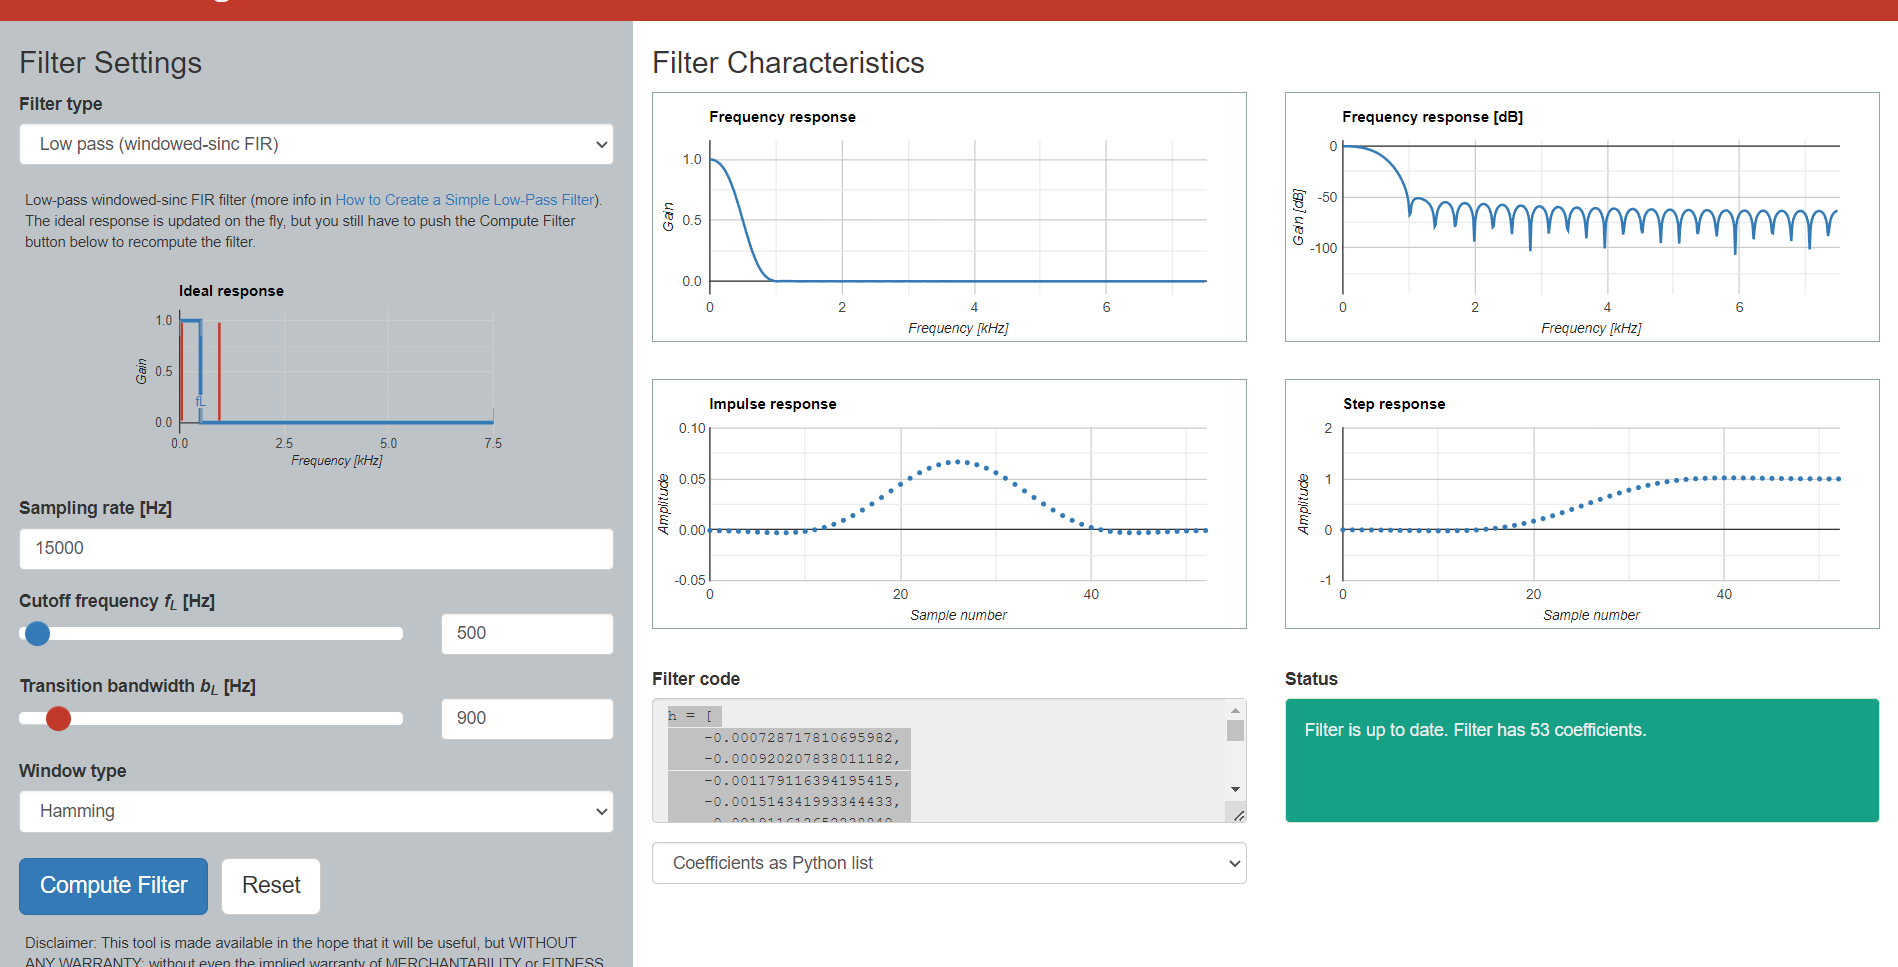

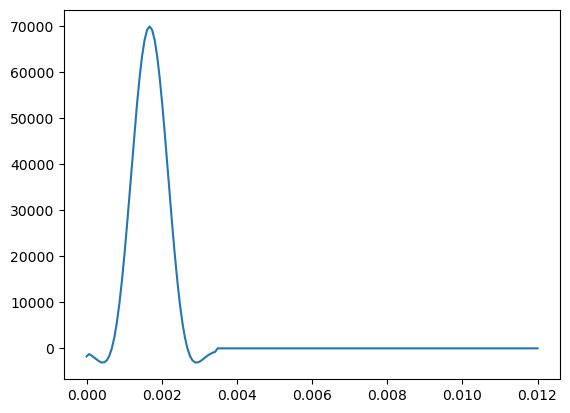

180

In [22]:
impulse = np.zeros(180)

impulse[0] = 1



y_impulse = []
numDataPoints = np.size(impulse)


# implementing a delay line
delayLine = np.zeros(order)

for i in range (np.size(impulse)) :
    delayLine[0] = impulse[i]

    # Fill delay line
    for j in reversed(range (1, order)) :
        delayLine[j] = delayLine[j-1]

    # multiply and accumulate
    multResult = np.multiply(b, delayLine)
    y_impulse.append(sum(multResult))
    

plt.plot(time, y_impulse)
plt.show()


np.size(time)